![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [4]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [5]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [6]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 1
vect_A = CountVectorizer(lowercase=False)
X_train_A = vect_A.fit_transform(X_train)
X_test_A = vect_A.transform(X_test)

In [18]:
vect_A.vocabulary_

{'Oral': 61132,
 'history': 129173,
 'is': 134475,
 'what': 181272,
 'ever': 119498,
 'they': 173140,
 'say': 162578,
 'it': 134615,
 'Nazis': 58256,
 'in': 131829,
 'the': 172722,
 '1930': 1729,
 'did': 113518,
 'eugenic': 119347,
 'experiments': 120172,
 'on': 147822,
 'Native': 58156,
 'children': 105022,
 'at': 96909,
 'McGill': 54233,
 'with': 182166,
 'full': 124144,
 'knowledge': 136538,
 'of': 147398,
 'government': 126126,
 'Yup': 90402,
 'if': 131062,
 'happened': 127732,
 'who': 181594,
 'are': 95877,
 'we': 180830,
 'to': 173931,
 'didn': 113538,
 'Marijuana': 53436,
 'less': 137960,
 'harmful': 127851,
 'human': 130223,
 'health': 128276,
 'than': 172662,
 'cigarettes': 105426,
 'which': 181411,
 'widely': 181741,
 'used': 178636,
 'and': 94689,
 'there': 173026,
 'no': 146013,
 'ban': 98109,
 'reduces': 158374,
 'stress': 169445,
 'aggression': 93404,
 'level': 138021,
 'leading': 137522,
 'crime': 109936,
 'its': 134679,
 'medical': 141302,
 'value': 178957,
 'favorable'

In [35]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=50, max_depth=10,max_features='log2')
rfr.fit(X_train_A, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=50,
                      n_jobs=-1)

In [36]:
y_pred_rfr = rfr.predict(X_test_A)
mse_rfr_A = mean_squared_error(y_test, y_pred_rfr)
print("MSE RandomForest_A:", mse_rfr_A)

MSE RandomForest_A: 0.038954803044590064


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [21]:
# Celda 2
vect_tri = CountVectorizer(lowercase=False, ngram_range=(3, 3))
X_train_tri = vect_tri.fit_transform(X_train)
X_test_tri = vect_tri.transform(X_test)

In [22]:
vect_tri.vocabulary_

{'Oral history is': 1113200,
 'history is what': 5147747,
 'is what ever': 5689968,
 'what ever they': 10565895,
 'ever they say': 4153114,
 'they say it': 9650083,
 'say it is': 8265642,
 'it is Nazis': 5745531,
 'is Nazis in': 5573805,
 'Nazis in the': 1032719,
 'in the in': 5406700,
 'the in 1930': 9322953,
 'in 1930 did': 5314256,
 '1930 did eugenic': 37094,
 'did eugenic experiments': 3755968,
 'eugenic experiments on': 4126990,
 'experiments on Native': 4216016,
 'on Native children': 7072975,
 'Native children at': 1029606,
 'children at McGill': 3243177,
 'at McGill with': 2550285,
 'McGill with the': 953052,
 'with the full': 10794201,
 'the full knowledge': 9301234,
 'full knowledge of': 4604997,
 'knowledge of the': 5900725,
 'of the government': 6987812,
 'the government Yup': 9306943,
 'government Yup if': 4758301,
 'Yup if they': 1726162,
 'if they say': 5269051,
 'say it happened': 8265624,
 'it happened who': 5741330,
 'happened who are': 4869893,
 'who are we': 1064577

In [23]:
rfr_tri = RandomForestRegressor(n_jobs=-1, n_estimators=50, max_depth=10,max_features='log2')
rfr_tri.fit(X_train_tri, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=50,
                      n_jobs=-1)

In [24]:
y_pred_tri = rfr_tri.predict(X_test_tri)
mse_rfr_tri = mean_squared_error(y_test, y_pred_tri)
print("MSE RandomForest_tri:", mse_rfr_tri)

MSE RandomForest_tri: 0.03903225831711749


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
El nombre TF-IDF viene de "Term Frequency-Inverse Document Frequency", que son dos componentes:

Term Frequency (TF): Es una medida de la frecuencia con la que aparece una palabra en un documento. Se calcula dividiendo el número de veces que una palabra aparece en un documento por el número total de palabras en ese documento. Esto da más peso a los términos que aparecen con más frecuencia en un documento particular. Inverse Document Frequency (IDF): Mide la importancia de una palabra en el corpus entero. Se calcula tomando el logaritmo del número total de documentos en el corpus dividido por el número de documentos que contienen la palabra. Esto reduce el peso de los términos que aparecen muy frecuentemente en el corpus y que, por lo tanto, son menos informativos que aquellos que aparecen en un pequeño número de documentos.

La puntuación TF-IDF de una palabra en un documento es el producto de su TF y su IDF. De esta forma, TfidfVectorizer convierte el texto en una matriz de características TF-IDF que refleja no sólo la presencia sino la relevancia de las palabras en los documentos.

Ventajas Resalta las Palabras Importantes: Diferencia las palabras que son comunes en el corpus entero y aquellas que son únicas en documentos individuales, dándole más importancia a estas últimas. Mejora de la Exactitud de los Modelos: A menudo, mejora la exactitud de los modelos de clasificación y clustering porque considera la importancia general de las palabras, no solo su frecuencia en un solo documento.

Desventajas Mayor Complejidad Computacional: El cálculo del IDF añade complejidad en comparación con el simple conteo de frecuencias. Menos Intuitivo: Es más difícil de interpretar que un simple conteo de palabras porque las puntuaciones TF-IDF no son frecuencias directas. No Capta Siempre el Contexto: A pesar de medir la relevancia de las palabras, no toma en cuenta el orden ni la proximidad de las palabras entre sí, lo que podría ser importante en algunos análisis.

Comparando TfidfVectorizer con CountVectorizer: La principal diferencia es que el primero asigna un peso a las palabras que es proporcional a su importancia, mientras que el segundo solo considera la frecuencia. TfidfVectorizer puede ser preferido en situaciones donde las palabras que son menos frecuentes en el corpus entero, pero más frecuentes en documentos individuales, son de particular interés. Por otro lado, CountVectorizer puede ser suficiente o preferible cuando solo nos importa la frecuencia de las palabras sin importar su relevancia en un conjunto más amplio de documentos.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [25]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase=False,ngram_range=(3, 3),max_features=50000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [26]:
tfidf_vectorizer.vocabulary_

{'they say it': 39996,
 'say it is': 31928,
 'in the in': 19778,
 'with the full': 47887,
 'knowledge of the': 23226,
 'of the government': 27719,
 'who are we': 46839,
 'are we to': 8303,
 'to say it': 43006,
 'and there is': 7187,
 'there is no': 39463,
 'effects on the': 13833,
 'on the health': 28757,
 'that if we': 34343,
 'if we have': 18771,
 'the young and': 39008,
 'will have less': 47443,
 'is no need': 21014,
 'no need to': 25856,
 'need to have': 25536,
 'bigger than the': 10343,
 'and see how': 6792,
 'see how many': 32056,
 'photos of the': 30500,
 'of the White': 27521,
 'all on the': 5371,
 'on the other': 28816,
 'the other side': 37656,
 'stood up to': 33391,
 'did you not': 12704,
 'not agree with': 25985,
 'agree with it': 5249,
 'they ll be': 39927,
 'You could have': 4608,
 'It was great': 1909,
 'We get it': 4102,
 'are the ones': 8222,
 'the ones who': 37588,
 'vast amounts of': 44661,
 'from the poor': 15751,
 'so you don': 32934,
 'you don have': 49148,
 'don 

In [ ]:
from sklearn.model_selection import cross_val_score

max_depth_range = range(1, 11)
mse_scores = []

for depth in max_depth_range:
    rfr_tfidf = RandomForestRegressor(max_depth=depth, random_state=1, n_jobs=-1)
    mse_scores.append((-cross_val_score(rfr_tfidf, X_train_tfidf, y_train, cv=5, scoring='neg_mean_squared_error')).mean())

print(sorted(zip(mse_scores, max_depth_range))[::-1][-1])

plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [32]:
rfr_tfidf = RandomForestRegressor(n_jobs=-1,max_depth=10)
rfr_tfidf.fit(X_train_tfidf, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1)

In [33]:
y_pred_tfidf = rfr_tfidf.predict(X_test_tfidf)
mse_rfr_tfidf = mean_squared_error(y_test, y_pred_tfidf)
print("MSE RandomForest_tfidf:", mse_rfr_tfidf)

MSE RandomForest_tfidf: 0.03844118162235497


In [29]:
from xgboost import XGBRegressor
xgr=XGBRegressor()
xgr.fit(X_train_tfidf, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [30]:
y_pred= xgr.predict(X_test_tfidf)
MSE_XGR=mean_squared_error(y_test, y_pred)
print("MSE XGBoost:",MSE_XGR)

MSE XGBoost: 0.037359491270699145


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

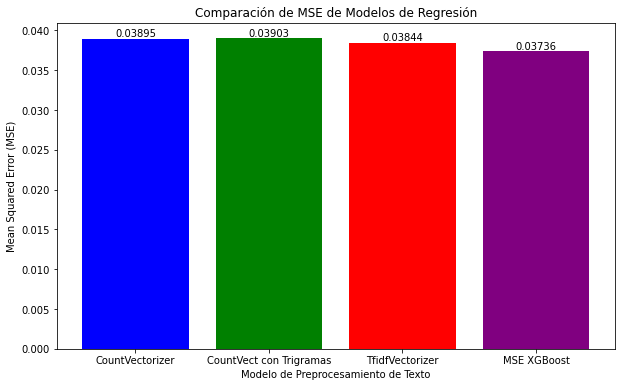

In [37]:
# Celda 5
import matplotlib.pyplot as plt

modelos = ['CountVectorizer', 'CountVect con Trigramas', 'TfidfVectorizer', 'MSE XGBoost']
mse_valores = [mse_rfr_A, mse_rfr_tri, mse_rfr_tfidf,MSE_XGR]

plt.figure(figsize=(10, 6))
plt.bar(modelos, mse_valores, color=['blue', 'green', 'red','purple'])
plt.title('Comparación de MSE de Modelos de Regresión')
plt.xlabel('Modelo de Preprocesamiento de Texto')
plt.ylabel('Mean Squared Error (MSE)')

for i in range(len(mse_valores)):
    plt.text(i, mse_valores[i], round(mse_valores[i], 5), ha='center', va='bottom')
plt.show()

La gráfica muestra que el modelo que utiliza TfidfVectorizer tiene un desempeño significativamente mejor (un MSE más bajo implica mejores predicciones) que los modelos que utilizan CountVectorizer, ya sea con unigramas o trigramas. Esto podría deberse a que TfidfVectorizer no sólo cuenta la frecuencia de las palabras, sino que también ajusta esta frecuencia según la importancia de la palabra en el conjunto de documentos completo, dando menos peso a las palabras que aparecen muy frecuentemente y que podrían ser menos informativa. Además, se incluye un modelo XGBOOST con TfidfVectorizer que genera mejores resultados.